# Find a structured dataset with 1,000,000 rows. Execute some queries using where, group by, having with the same output Compare their runtimes!

## Using Where

~~~~sql
EXPLAIN ANALYZE
SELECT transaction_count FROM bank
WHERE transaction_count > 1000;
~~~~

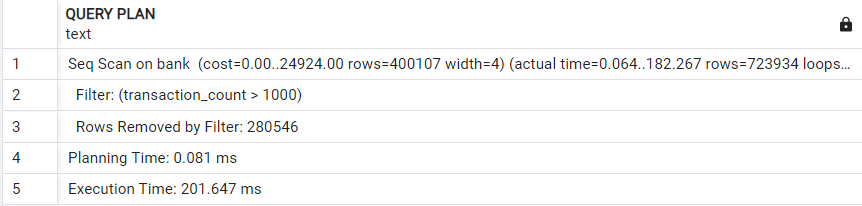

## Using Having

~~~~sql
EXPLAIN ANALYZE
SELECT transaction_count FROM bank
GROUP BY id, transaction_count
HAVING transaction_count > 1000;
~~~~

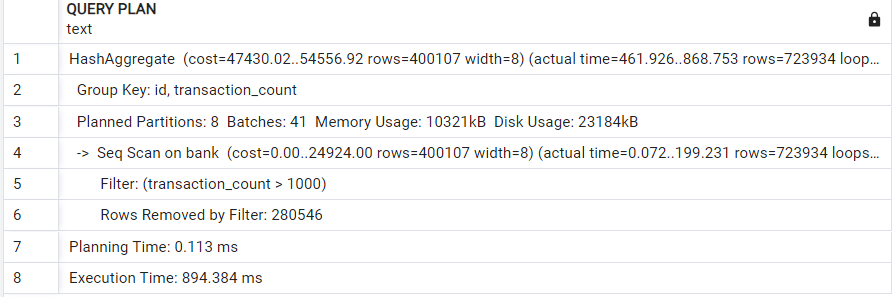

## Using Where, with additional Group By

~~~~sql
EXPLAIN ANALYZE
SELECT transaction_count FROM bank
WHERE transaction_count > 1000
GROUP BY id, transaction_count;
~~~~

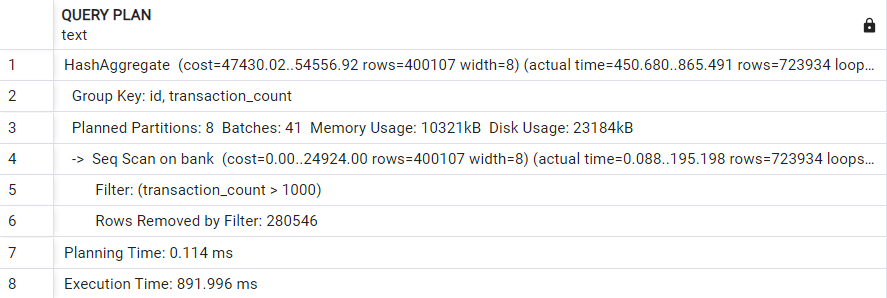

## Statistics over 20 runs

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv('../data/SQL_Stats.csv')
df.head(6)

,plan_w,exe_w,plan_h,exe_h,plan_wgb,exe_wgb
0,0.081,201.647,0.113,894.384,0.114,891.996
1,0.076,193.217,0.155,894.426,0.186,876.127
2,0.058,221.415,0.138,914.206,0.104,881.279
3,0.087,226.798,0.093,900.863,0.120,868.103
4,0.103,220.127,0.106,849.859,0.100,863.999
5,0.066,216.141,0.090,931.807,0.111,868.709


Due to the planning time contribution to the overall query time being insignificant (less than 0.1%), it's possible to ignore the difference during the planning phase of each type of query

### Where

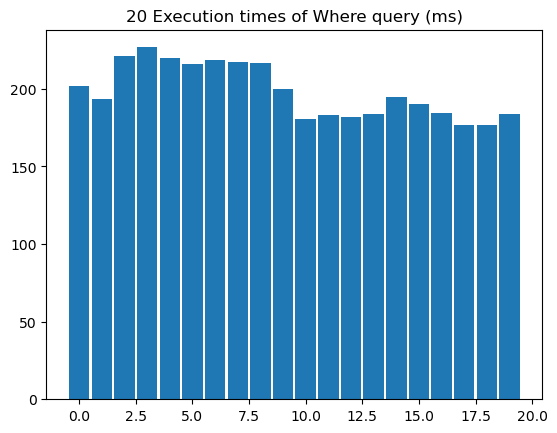

In [46]:
x_label = range(20)
exe_time_w = df['exe_w']
width = 0.9 # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(20)

p = ax.bar(x_label, exe_time_w, width, bottom=bottom)

ax.set_title('20 Execution times of Where query (ms)')

plt.show()

### Having

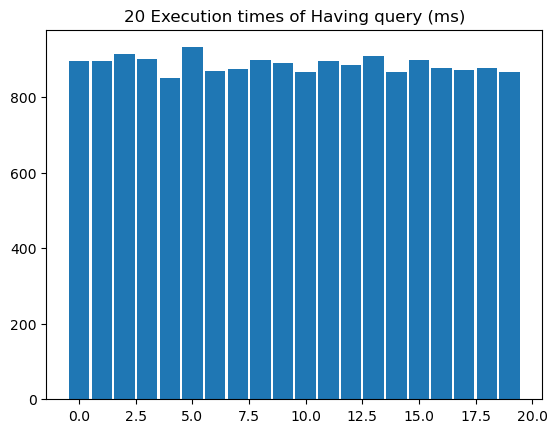

In [47]:
x_label = range(20)
exe_time_w = df['exe_h']
width = 0.9 # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(20)

p = ax.bar(x_label, exe_time_w, width, bottom=bottom)

ax.set_title('20 Execution times of Having query (ms)')

plt.show()

### Where, with additional Group By

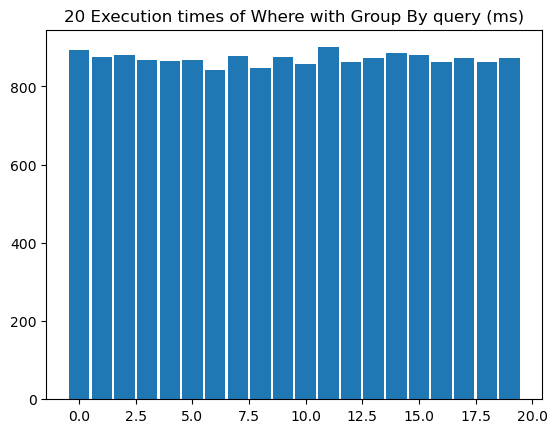

In [48]:
x_label = range(20)
exe_time_w = df['exe_wgb']
width = 0.9 # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(20)

p = ax.bar(x_label, exe_time_w, width, bottom=bottom)

ax.set_title('20 Execution times of Where with Group By query (ms)')

plt.show()

### Mean, Median and Standard Deviation of each query type

In [80]:
stat_df = pd.DataFrame()
stat_df['Mean'] = df[['exe_w', 'exe_h', 'exe_wgb']].mean()
stat_df['Median'] = df[['exe_w', 'exe_h', 'exe_wgb']].median()
stat_df['Standard Deviation'] = df[['exe_w', 'exe_h', 'exe_wgb']].std()
stat_df = stat_df.round(2)

stat_df

,Mean,Median,Standard Deviation
exe_w,198.40,193.98,17.40
exe_h,886.40,888.13,19.75
exe_wgb,870.99,872.13,13.86


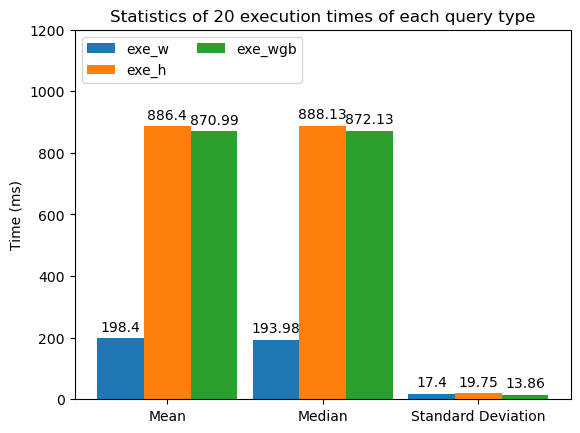

In [81]:
stats = stat_df.columns
query_data = stat_df.T

x = np.arange(len(stats))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for key, values in query_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (ms)')
ax.set_title('Statistics of 20 execution times of each query type')
ax.set_xticks(x + width, stats)

ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1200)

plt.show()

Based on the chart above, it can be concluded that: when the results are the same across queries, the Where query is the best in terms of performance time comparing to Having and Where with Group By query.

It's a surprise, but the Where with Group By query is the most stable of the three, with the smallest standard deviation despite its rather paramount mean and median.